# Remote Temperature Sensing with the Bayes' filter


In several applications, especially in the context of wireless sensor networks, 
data of interest such as temperature, pressure, images, etc. is acquired by 
several stand-alone sensors and transmitted to a remote central station, as 
illustrated in the figure below. Since these sensors are stand-alone, battery 
life is a concern; one of the main factors limiting the battery life are wireless 
transmissions. Therefore it is desired to obtain accurate estimates while minimizing 
transmissions. In this exercise, we will consider a sensor transmitting temperature 
measurements to a remote station and we will study and compare two forms of 
remote sensing: periodic transmissions and threshold based transmissions.


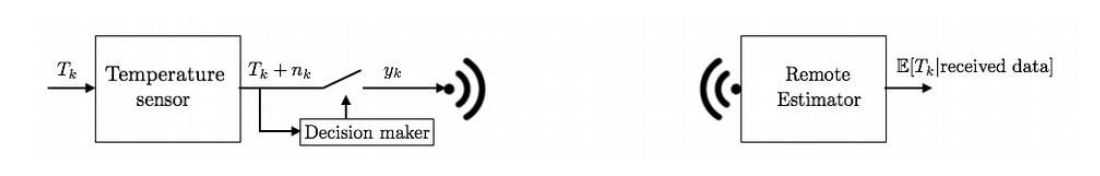


We will consider the following model for the evolution of the temperature 
$T_k$ at time $k \in  \{0, 1,...., h\}$

$$T_{k+1}=T_{k}+U_{k}+w_{k}$$

where $U_k$ is the temperature control input and the $w_k$ are independent 
and identically distributed random variables. We will consider a quantized model 
for $T _k$, quantized with a step $\epsilon$, by considering that the disturbances 
live in a finite set with $n_r = 2n_w + 1$ elements, where $n_w$ is a positive 
integer, and are characterized by

$$\text{Prob}\left[w_{k}=\epsilon \bar{w}_{i}\right]=r_{i}$$

with $\bar{w}_{i}=-n_{w}+i-1$ for $i \in\left\{1, \ldots, n_{r}\right\}$and 
$\sum_{i=1}^{n_{r}} r_{i}=1$. We assume that the input is zero, $U_{k}=0$, for 
every time $k$. 

For a periodic transmission strategy with period $N$, the remote sensor has 
access to the following measurements 


$$
y_{k} = \left\{
    \begin{array}\\
        {T_{k}+v_{k}, \text { if } k=0 \text { or } k \text { is an integer multiple of } N} \\
        {\emptyset, \text { otherwise }} \\
    \end{array}
\right.
$$


where $\emptyset$ denotes the event of no transmission and $v_{k}$ models 
sensor noise which, as $w_{k}$, is assumed to live in a finite set with $n_{q}=2 
n_{v}+1$ elements where $n_{v}$ is a positive integer, and characterized by

$$\text{Prob}\left[v_{k}=\epsilon \bar{v}_{i}\right]=q_{i},$$

where $\bar{v}_{i}=-n_{v}+i-1$ for $i \in\left\{1, \ldots, n_{q}\right\}$, 
and $\sum_{i=1}^{n_{q}} q_{i}=1$, For a threshold based policy, the remote sensor 
has access to the following measurements 

$$y_{k}=\left\{
    \begin{array}\\
        {T_{k}+v_{k}, \text { if }\left|y_{k}-\hat{y}_{k-1}\right|>L} \\
        {\emptyset, \text { otherwise }}
    \end{array}
\right.
\text{,}$$

where $L \in\{\epsilon | k \in \mathbb{Z}\}$ is the threshold and $\hat{y}_{k}$ 
is the most recently received measurement, which is described by $\hat{y}_{0}=T_{0}$ 
(assuming the initial temperature is known at the remote side) and

$$\hat{y}_{k}=\left\{
    \begin{array}\\
        {\hat{y}_{k-1} \text { if } y_{k}=\emptyset} \\ 
        {y_{k}, \text { otherwise }}
    \end{array}
\right.$$

Let $I_{k}:=\left\{y_{0}, y_{1}, y_{2}, \ldots, y_{k}\right\}$ be the information 
available by the remote estimator at time $k$, besides the initial temperature 
$T_{0}$. The goal of this live script, is to compute

$$\text{Prob}\left[T_{k}=\epsilon i | I_{k}\right],$$

which allows to compute the estimate $\mathbb{E}\left[T_{k} | I_{k}\right]$ 
of the temperature at the remote side and compute and compare the average transmission 
rate and estimation error variance of both transmission methods, as exemplified 
in the appendix for the case where is no sensor noise.

The Matlab `functionbayesfilterperiodicsensing` computes the $\text{Prob}\left[T_{k}=\epsilon 
i | I_{k}\right]$, for a given horizon $k \in\{0, \ldots, h\}$ when transmissions 
are

periodic. The input arguments are:
* A cell object y with $h+1$ components such that $y\{k+1\}=[] \, 1 \text 
{ if } y_{k}=\emptyset \text { and } y\{k+1\}=\frac{y_{k}-T_{0}}{\epsilon}$,otherwise, 
for $k \in\{0,1, \ldots, h\}$. Note that $y\{k+1\}=[]$ if $k$ is not 0 or an 
integer multiple.
* The vector of probabilities $r=\left[r_{1}.....r_{n}\right]$.
* The vector of probabilities $q=\left[q_{1}.....q_{n_{q}}\right]$

The output is a $\left(2 n_{w}(h+1)+1\right) \times(h+1)$ matrix $\mathrm{p}=\left[p_{i 
j}\right]$ where each component equals

$$p_{i j}=\text{Prob}\left[T_{j-1}=T_{0}+\epsilon\left(-n_{w} h+i-1\right) 
| I_{j-1}\right]$$

for $\left.i \in\left\{1, \ldots, 2 n_{w}(h+1)+1\right)\right\}, j \in\{1, 
\ldots, h+1\}$

Additionally, the function `bayesfilterthresholdsensing` computes $\text{Prob}\left[T_{k}=\epsilon 
i|I_{k}\right]$ for a given horizon $k \in\{0, \ldots, h\}$ when transmissions 
follow the threshold based policy and there is no sensor noise $\left(v_{k}=0 
\text { for every } k\right)$. The inputs and outputs are the same as `functionbayesfilterperiodicsensing` 
and the input ${L_{int}}$ , is an integer such that the threshold is $L=\epsilon$ 
Lint. Although redundant, it can be assumed that $y\{1\}=[]$.

The following example can be used to test both functions.

In [ ]:
import numpy as np

In [ ]:
def bayesfilterperiodicsensing(y, p, q):

    # initializations
    h  = len(y)
    lp = len(p)
    nw = (lp - 1) // 2
    nq = len(q)
    nv = (nq - 1) // 2
    nx = (lp - 1) * h + 1
    P  = np.zeros([nx, h])
    p0 = np.zeros([nx, 1])
    p0[(nx - 1) // 2, 0] = 1            # initial probability distribution
    M = np.zeros([nx, nx])              # transition matrix Bayes filter
    R = np.zeros([nx + 2 * nv, nx])     # sensor matrix Bayes filter

    # Matrices M and R
    for i in range(0, nx):
        if i <= nw-1 or i >= nx - nw - 1:
            M[i, i] = 1
        else:
            M[i - nw: i + nw + 1, i] = p
    for i in range(0, nx):
        R[i - nv + nv: i + nv + nv + 1, i] = q

    # Bayes's filter
    # first measurements
    phat = np.diag(R[nv + y[0] + (nx - 1) // 2, :]) @ p0
    P[:, [0]] = phat / sum(phat)
    for k in range(0, h - 1):
        p_1 = M @ P[:, k]
        if not not y[k+1]:
            phat = np.diag(R[nv + y[k + 1] + (nx - 1) // 2, :]) @ p_1
            P[:, k + 1] = phat / sum(phat)
        else:
            P[:, k + 1] = p_1
    return P

In [ ]:
def bayesfilterthresholdsensing(y, p, L):

    # initializations
    h = len(y)
    lp = len(p)
    nw = (lp - 1) // 2
    q = [1]
    nq = len(q)
    nv = (nq - 1) // 2
    nx = (lp - 1) * h + 1

    P = np.zeros([nx, h])
    p0 = np.zeros([nx, 1])
    p0[(nx - 1) // 2, 0] = 1            # initial probability distribution
    M = np.zeros([nx, nx])              # transition matrix Bayes filter
    R = np.zeros([nx + 2 * nv, nx])     # sensor matrix Bayes filter
    R2 = np.zeros([nx + 2 * L, nx])

    # Matrices M and R
    for i in range(0,nx):
        if i <= nw -1 or i >= nx - nw -1:
            M[i, i] = 1
        else:
            M[i - nw: i + nw + 1, i] = p

    for i in range(0,nx):
        R[i - nv + nv: i + nv + nv + 1, i] = q

    for i in range(0, nx):
        R2[i - L + L: i + L + L + 1, i] = (1 / (2 * L + 1) * np.ones(2 * L + 1))

    # Bayes's filter
    yhat = [[] for _ in range(h-1)]

    yhat[0] = 0                         # initial error is zero
    y[0] = 0                            # initial measurement is zero
    phat = np.diag(R[y[0] + (nx - 1) // 2, :]) @ p0
    P[:, [0]] = phat / sum(phat)

    for k in range(0, h - 1):
        p_1 = M @ P[:, k]
        if not not y[k+1]:
            yhat[k + 1] = y[k + 1]
            phat = np.diag(R[y[k + 1] + (nx - 1) // 2, :]) @ p_1
            P[:, k + 1] = phat / sum(phat)
        else:
            yhat[k + 1] = yhat[k]
            phat = np.diag(R2[yhat[k + 1] + (nx - 1) // 2  + L, :]) @ p_1
            P[:, k + 1] = phat / sum(phat)

    return P

In [ ]:
# Choose function to implement: 1 for functionbayesfilterperiodicsensing
# and 2 for bayesfilterthresholdsensing 

ChooseFunc = 1

y = [[] for _ in range(7)]

# Sample input for the implementation of the functionbayesfilterperiodicsensing

if ChooseFunc == 1:
    y[0] = 0
    y[1] = []
    y[2] = []
    y[3] = 2
    y[4] = []
    y[5] = []
    y[6] = -2
    r = np.array([0.1, 0.8, 0.1])
    q = np.array([0.1, 0.8, 0.1])
    P = bayesfilterperiodicsensing(y, r, q)
else:
    
    # Sample input for the implementation of the function bayesfilterthresholdsensing
    y[0] = []
    y[1] = []
    y[2] = 2
    y[3] = []
    y[4] = 4
    y[5] = []
    y[6] = []
    r = np.array([0.1, 0.1, 0.6, 0.1, 0.1])
    L = 1
    P = bayesfilterthresholdsensing(y, r, L)

In [ ]:
P

**Appendix**

In this appendix we assume  that there is no sensor noise ($v_k=0$ for all 
$k$) and $r_{nw+1+i} = r_{nw+1-i}$ for every $i\in \{1,\dots,n_w\}$. Let 
$\sigma_k=0$ if there is no transmission at time $k$ (i.e., $y_k=\emptyset$) 
and $\sigma_k=1$ otherwise. Then, the average transmission rate is 

$$ R_\text{ave}=\lim_{M\rightarrow \infty} \frac{1}{M}\mathbb{E}[\sum_{k=0}^{M-1}\sigma_k]$$

let us also define the remote estimation error  $e_k:=T_k-\hat{T}_k$, where 
$\bar{T}_k=\hat{y}_k$, and $T_k=y_k$, and the asymptotic error estimation 
variance as

$$ V_\text{ave}=\lim_{M\rightarrow \infty} \frac{1}{M}\sum_{k=0}^{M-1}\mathbb{E}[e_k^2].$$

Let us define the event of no transmissions up to time $k$, $\mathcal{A}_k:=\{\emptyset,\emptyset,\dots,\emptyset\}$ 
and

$$p^0_{i,k}:= \text{Prob}[T_k=T_0+\epsilon i|I_k=\mathcal{A}_k]$$

which can be computed from the output p of the functions bayesfilterperiodicsensing 
and bayesfilterthresholdsensing when y corresponds to no transmissions for every 
time step $\ell$ up to $k$ ($y\{\ell+1\}=[]$), except when $\ell=0$. 
It can be shown that for periodic transmissions with period $N$,

$$\text{Periodic:} \ \ \ \ \ \ \ \ \ \ \ \  R_\text{ave}=\frac{1}{N}, \ 
\ \ \ \ \ \ \ \ V_\text{ave} =\frac{1}{N}\sum_{k=1}^{N-1}  \sum_{i=-n_wk}^{n_wk}i^2p^0_{k,i},  
$$

and for threshold based policies 

$$\text{Threshold:} \ \ \ \ \ \ \ \ \ \ \ \  R_\text{ave}=\frac{1}{\sum_{k=0}^{\infty}\gamma_k}, 
\ \ \ \ \ \ \ \ \ V_\text{ave} =R_\text{ave}\sum_{\ell=0}^\infty  (\sum_{k=1}^{\ell-1}\sum_{i=-(L-1)}^{L-1}i^2p^0_{k,i})(\gamma_\ell-\gamma_{\ell+1}),  
$$

where, for $k \in \mathbb{N}\cup \{0\}$, $ \gamma_{k+1}:=a_k\gamma_k, \gamma_0=1,  
$ $a_k=\sum_{i=-(N-1)}^{N-1}b_ip^0_{k,i}$, $a_0=b_0$, $b_i=\sum_{j\in 
\mathcal{J}_i}r_{n_w+1+j}$, and $\mathcal{J}_i:=\{j\in \mathbb{N}| -N\leq 
j+i \leq N,-n_w\leq j\leq n_w\}$. For the values $r = [0.1 \,\,\, 0.2 \,\,\, 0.4 \,\,\, 0.2 \,\,\, 0.1]$, the figure below plots the pairs average 
transmission rate and average estimation error variables for several values 
of $N$ and $L$ for the two transmission policies (note that as expected 
the threshold based transmission policy yields a better trade-off).

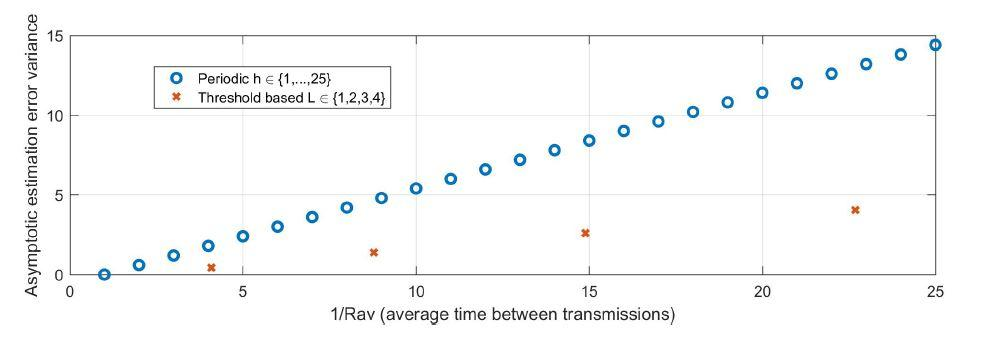
